In [18]:
import numpy as np
from tqdm import tqdm
import os

import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import Callback
from tensorflow.keras import backend as K 
import math

In [19]:
train_x = []
train_y = []
eval_x = []
eval_y = []

In [20]:
csv_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/data/fer2013.csv'

with open(csv_path) as f:
    for line in tqdm(f.read().splitlines()[1:]):
        emotion, pixels, usage = line.split(',')
    
        x = np.array(pixels.split(' ')).astype(float).reshape(48, 48, 1) / 255
        y = int(emotion)

        if usage == 'PrivateTest':
            eval_x.append(x)
            eval_y.append(y)
        else:
            train_x.append(x)
            train_y.append(y)

print('train : {}, eval :{}'.format(len(train_x), len(eval_x)))

100%|██████████| 35887/35887 [00:22<00:00, 1617.14it/s]

train : 32298, eval :3589


Angry


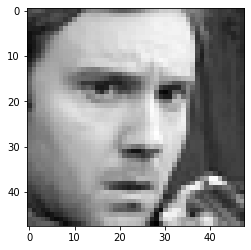

In [21]:
from matplotlib import pyplot as plt

LABELS = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

print(LABELS[train_y[0]])
plt.imshow(train_x[0].reshape([48, 48]), cmap='gray')

In [ ]:
import tensorflow as tf

# model 선언 
model = tf.keras.applications.MobileNetV2(input_shape=(48, 48, 1), weights=None, classes=7)

# model.compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[tf.keras.metrics.CategoricalAccuracy()])

#model.fit
hist = model.fit(np.stack(train_x),
          tf.keras.utils.to_categorical(train_y),
          epochs=10,
          batch_size=512,
          validation_data=(np.stack(eval_x),
                           tf.keras.utils.to_categorical(eval_y)))

Epoch 1/10
64/64 [==============================] - 7s 105ms/step - loss: 1.8310 - categorical_accuracy: 0.2448 - val_loss: 1.9340 - val_categorical_accuracy: 0.1655
Epoch 2/10
64/64 [==============================] - 6s 98ms/step - loss: 1.7132 - categorical_accuracy: 0.3113 - val_loss: 1.9286 - val_categorical_accuracy: 0.1744
Epoch 3/10
64/64 [==============================] - 6s 98ms/step - loss: 1.6102 - categorical_accuracy: 0.3673 - val_loss: 1.9263 - val_categorical_accuracy: 0.1744
Epoch 4/10
64/64 [==============================] - 6s 99ms/step - loss: 1.5032 - categorical_accuracy: 0.4215 - val_loss: 1.9414 - val_categorical_accuracy: 0.1744
Epoch 5/10
64/64 [==============================] - 6s 98ms/step - loss: 1.4240 - categorical_accuracy: 0.4525 - val_loss: 1.9562 - val_categorical_accuracy: 0.1368
Epoch 6/10
64/64 [==============================] - 6s 99ms/step - loss: 1.3511 - categorical_accuracy: 0.4842 - val_loss: 1.9874 - val_categorical_accuracy: 0.0153
Epoch 7/1

In [24]:
import os
model_path = os.getenv('HOME')+'/aiffel/tfjs_mobile/model.h5'
model.save(model_path)

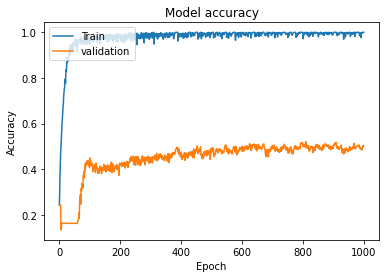

In [25]:
# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.plot(hist.history['categorical_accuracy'])
plt.plot(hist.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()